# LAB 1: Clean numerical data

### 1. Import the necessary libraries.

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataframe

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First, look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 4. Rename the columns so they follow the PEP8 (snake case).

In [7]:
cols = [col_name.lower().replace(" ", "_") for col_name in customer_df.columns]
customer_df.columns = cols
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Fix the data types of columns when necessary

effective_to_date should be datetime and it's object

In [8]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].astype("datetime64[ns]")

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 6. Plot a correlation matrix, and comment on what you observe.

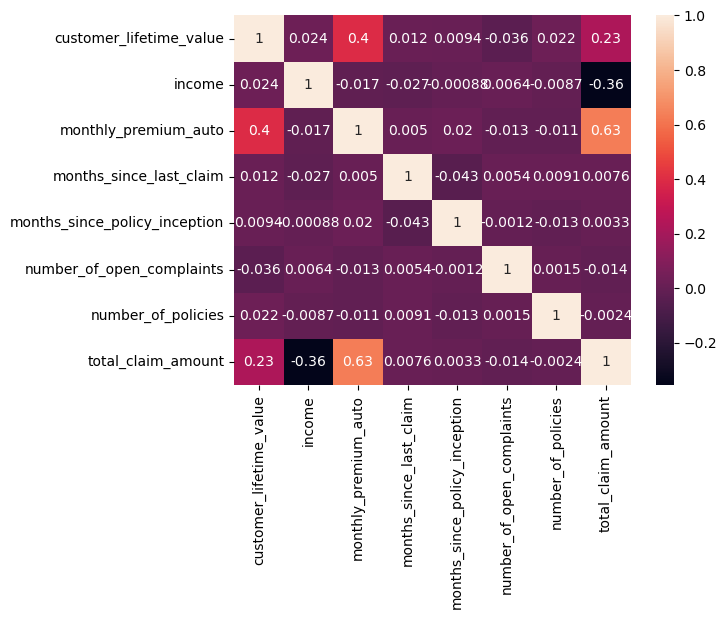

In [10]:
corr_matrix = customer_df.corr()
sns_plot = sns.heatmap(corr_matrix, annot=True)
plt.show()

There is not high correlation between features, with the exception of "total_claim_amount" and "monthly_premium_auto", where is quite high (0.63).

### 7. Plot every continuous variable. Comment what you can see in the plots.

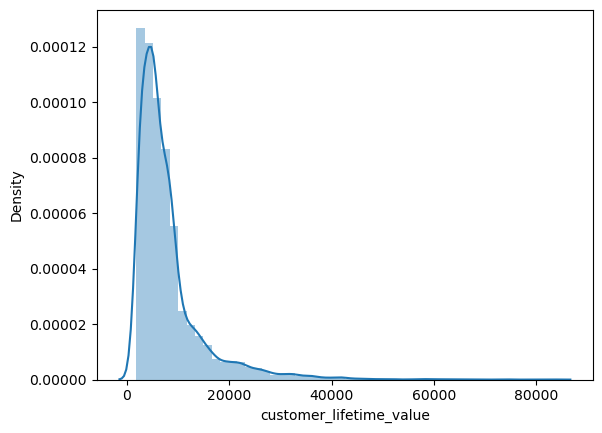

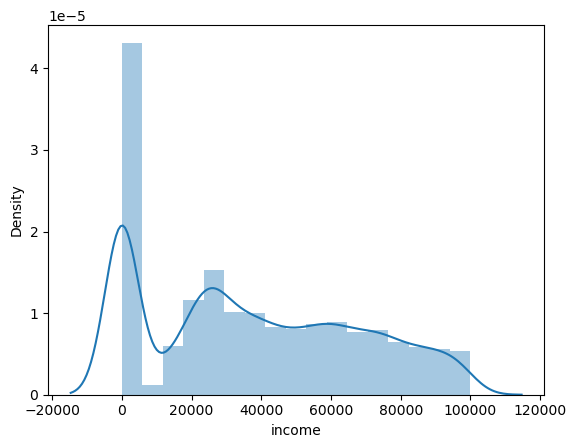

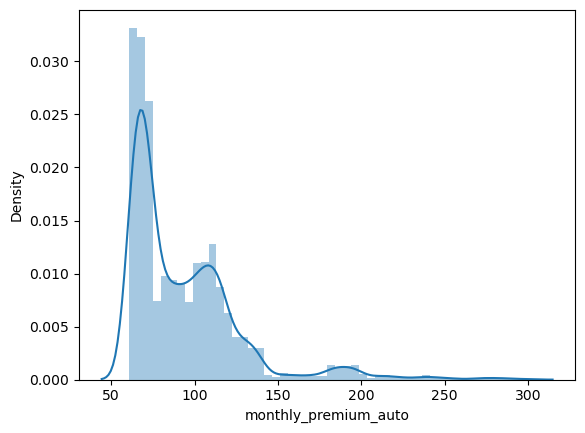

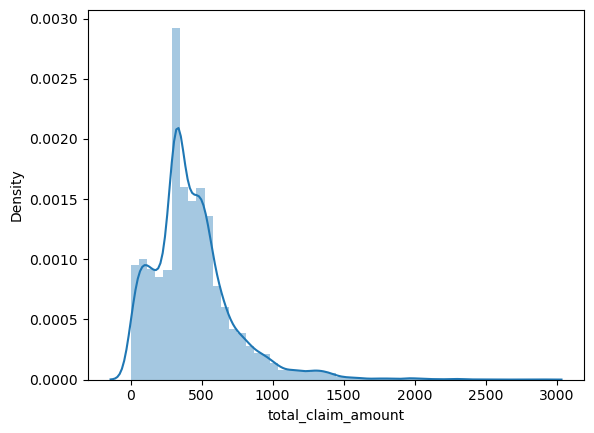

In [11]:
continous_variables = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']

for column in continous_variables:
    sns.distplot(customer_df[column])
    plt.show()

- 'customer_lifetime_value': very skewed to the right, although the maximum reaches more than 80,000 (outliers)
- 'income': huge number of zeros, this looks like there is missing data
- 'monthly_premium_auto': the distribution is relatively similar to customer_lifetime_value
- 'total_claim_amount': similar distribution to customer_lifetime_value and monthly_premium_auto

### 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). 
Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [12]:
discrete_variables = ['months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']

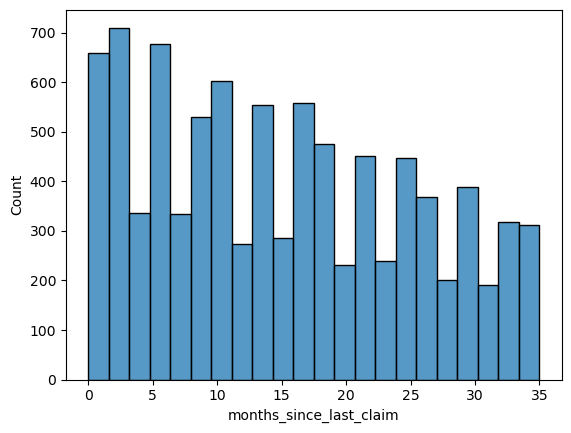

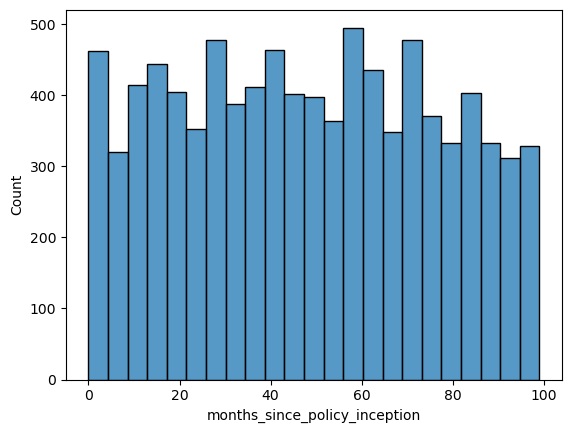

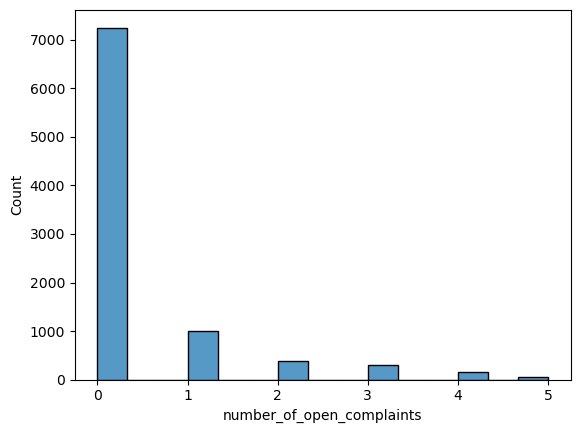

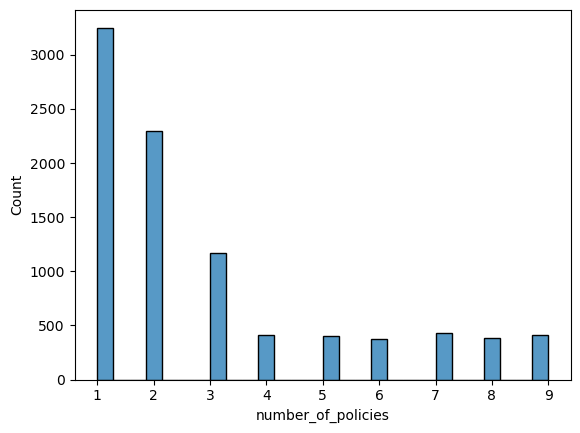

In [13]:
for column in discrete_variables:
    sns.histplot(customer_df[column])
    plt.show()

- 'months_since_last_claim'
- 'months_since_policy_inception'
- 'number_of_open_complaints': mostly zeros, but this has sense 
- 'number_of_policies': mostly 1-2, up to 9

In [14]:
plotting_categoricals = customer_df.select_dtypes(object)

# drop the customer id because it has no sense to plot it (one value per row = more than 9000 unique values)
plotting_categoricals = plotting_categoricals.drop("customer", axis = 1)

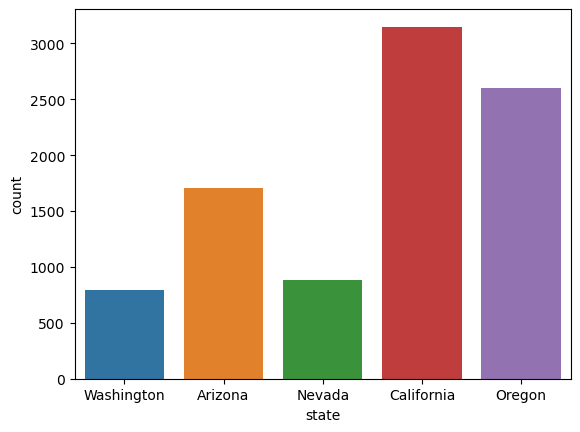

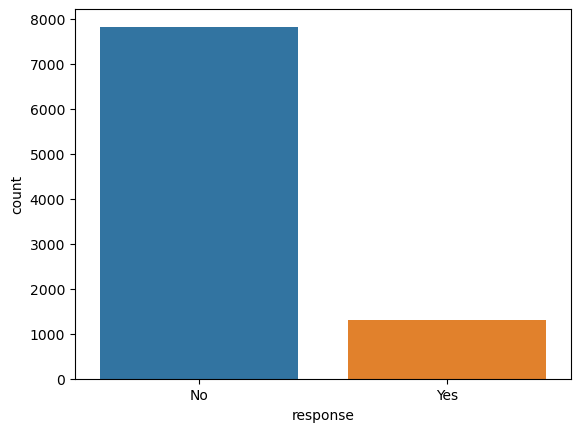

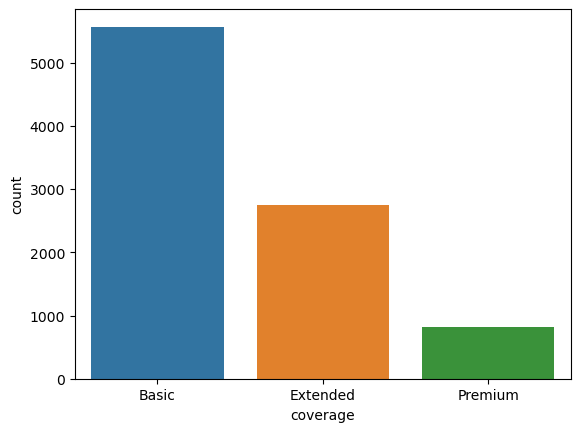

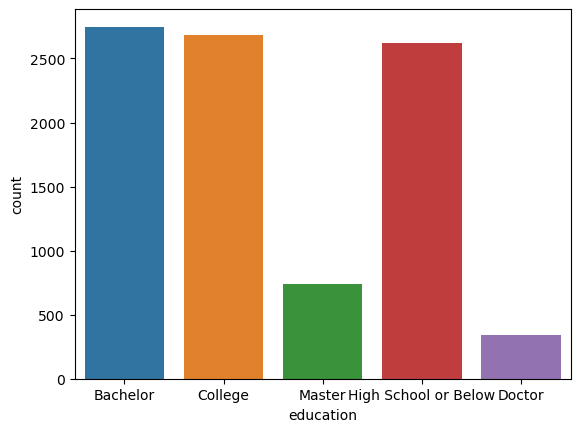

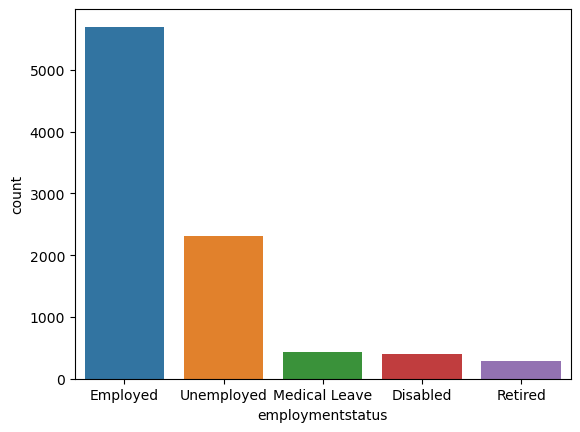

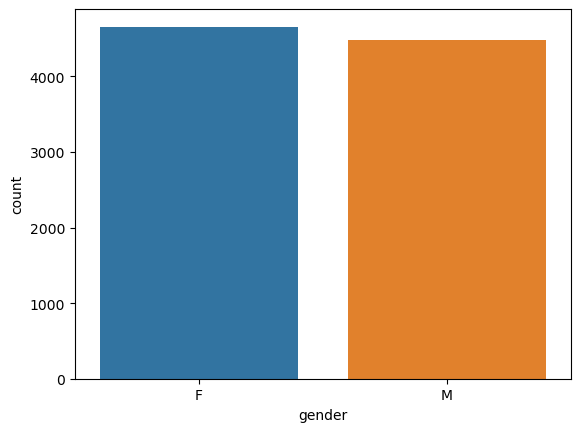

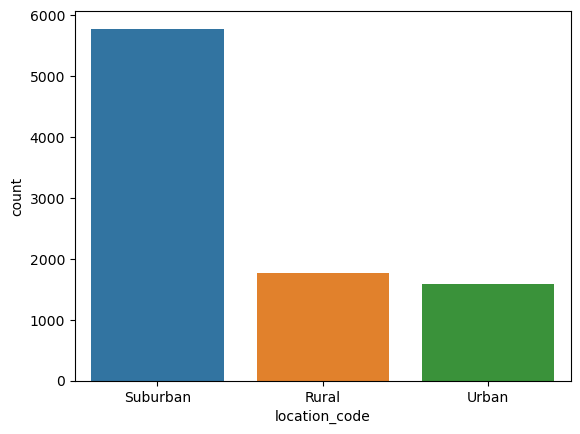

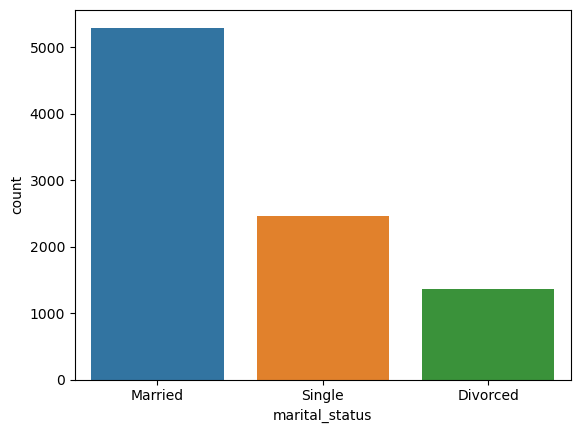

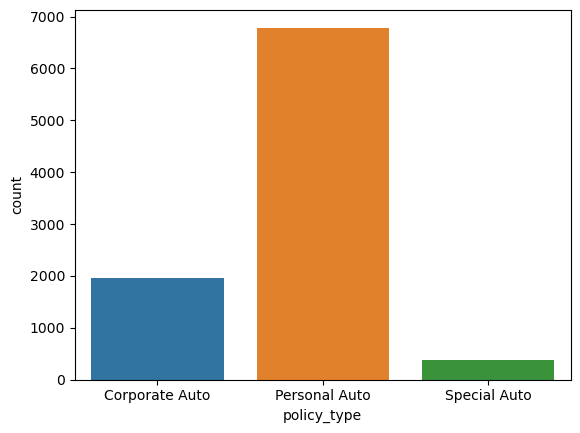

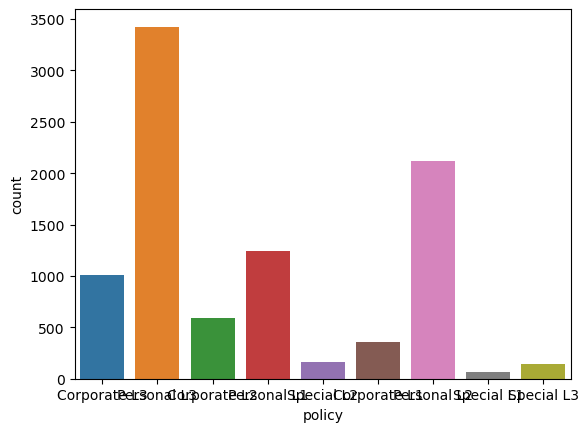

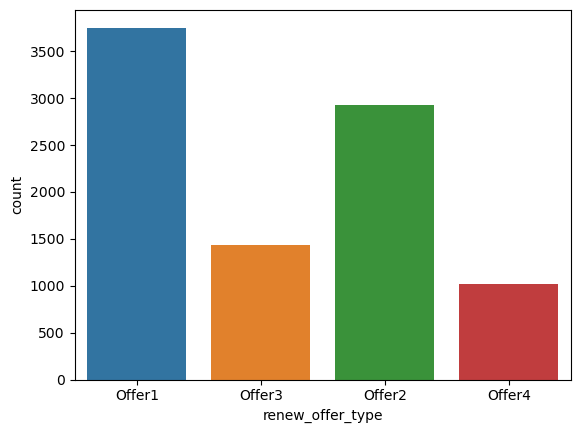

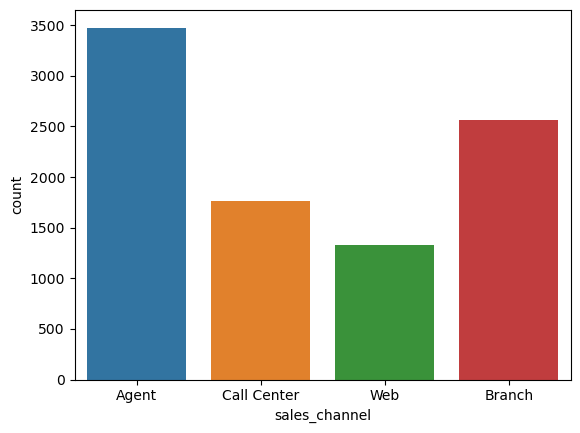

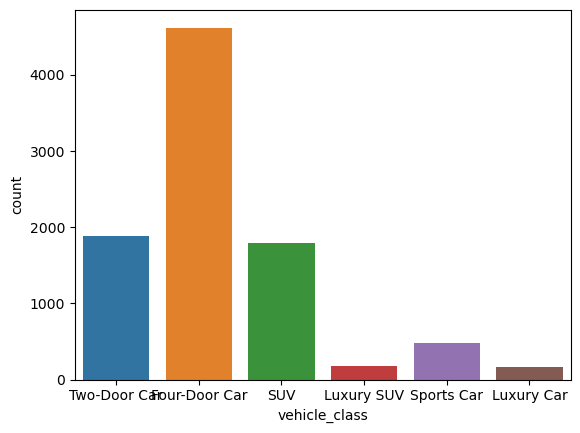

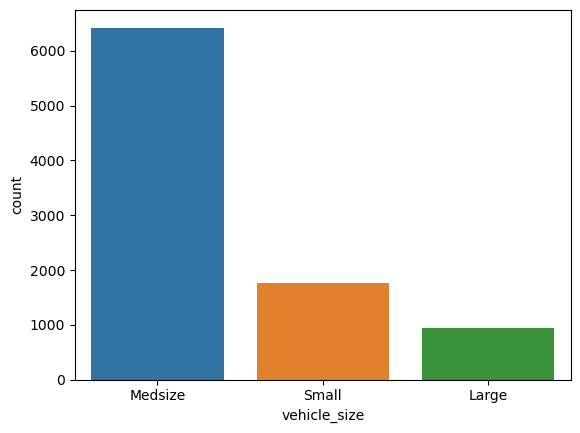

In [15]:
for column in plotting_categoricals.columns:
    sns.countplot(customer_df[column])
    plt.show()

- 'state': 5 categories, most importants are California and Oregon
- 'response': boolean (yes/no). Mainly "No"
- 'coverage': 3 categories, ordinal
- 'education': 5 categories, ordinal
- 'employmentstatus': 5 categories, mainly employed and unemployed. Maybe group the rest in "other"
- 'gender': 2 categories, very equal
- 'location_code': 3 categories, high proportion of suburban
- 'marital_status': 3 categories, high proportion of married
- 'policy_type': 3 categories, mainly personal auto
- 'policy': 9 categories, do value counts for this column to see better
- 'renew_offer_type': 4 categories, ordinal?
- 'sales_channel': 4 categories
- 'vehicle_class': 6 categories, group luxury and sports car?
- 'vehicle_size': 3 categories, ordinal

In [16]:
customer_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Policy could be grouped in 3 categories (personal, corporate and special)

### 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

[(-0.5, 10.0)]

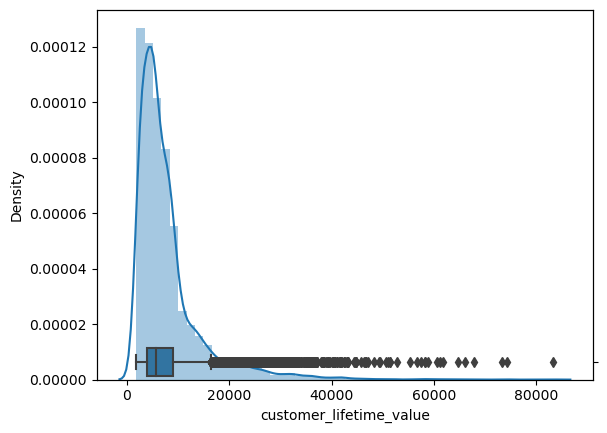

In [17]:
ax = sns.distplot(customer_df["customer_lifetime_value"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['customer_lifetime_value'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

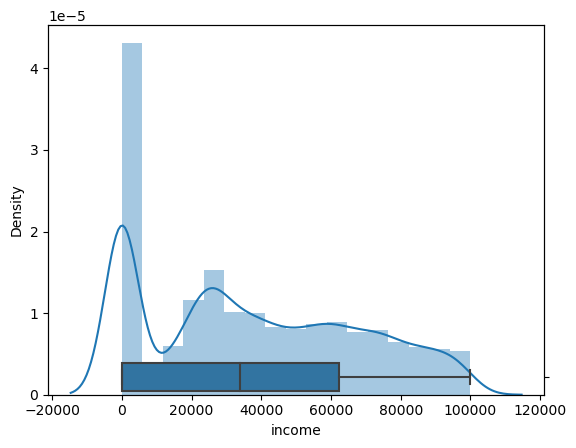

In [18]:
ax = sns.distplot(customer_df["income"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["income"], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

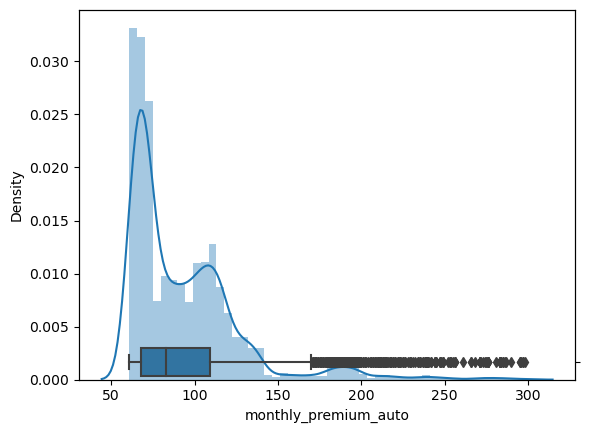

In [19]:
ax = sns.distplot(customer_df["monthly_premium_auto"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["monthly_premium_auto"], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

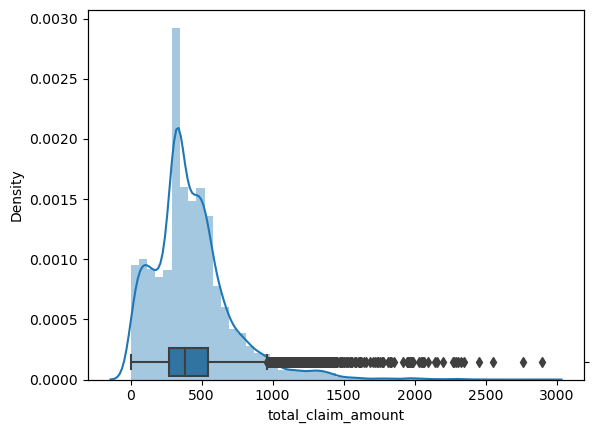

In [20]:
ax = sns.distplot(customer_df["total_claim_amount"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["total_claim_amount"], ax=ax2)
ax2.set(ylim=(-.5, 10))

There are outliers in customer_lifetime_value, monthly_premium_auto, total_claim_amount. <br>
I would consider removing a part of them (not all of them because it is too much data), but first I need to know which is the target and also decide the features that will be used as the independent variables. Also it is best to remove the outliers after applying transformations.

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [21]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no NaN values. However, let's have a look at income.

In [22]:
customer_df["income"].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [23]:
# percentage of zeros in income = 25%

2317 / 9134 * 100

25.366761550251805

In [24]:
customer_df["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [25]:
# however this is consistent with the number of unemployed customers, so leave the zeros.

# LAB 2: Clean categorical data

### 1. Import the necessary libraries if you are starting a new notebook.
### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

Already done

### 3. What should we do with the customer_id column?

In [26]:
# set customer id as index

customer_df = customer_df.set_index(["customer"])
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables

In [27]:
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(object)

In [28]:
# deal with the numerical discrete columns

categorical_df["number_of_open_complaints"] = customer_df["number_of_open_complaints"]
categorical_df["number_of_policies"] = customer_df["number_of_policies"]
categorical_df["months_since_last_claim"] = customer_df["months_since_last_claim"]
categorical_df["months_since_policy_inception"] = customer_df["months_since_policy_inception"]

numerical_df = numerical_df.drop(["number_of_open_complaints", "number_of_policies",
                                  "months_since_last_claim", "months_since_policy_inception"], axis = 1)

### 5. Plot every categorical variable. What can you see in the plots? 

Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

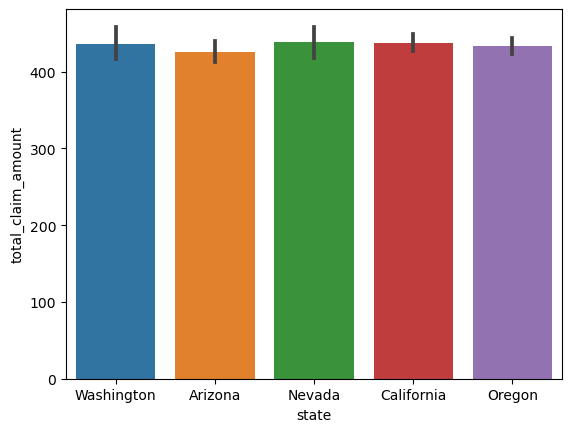

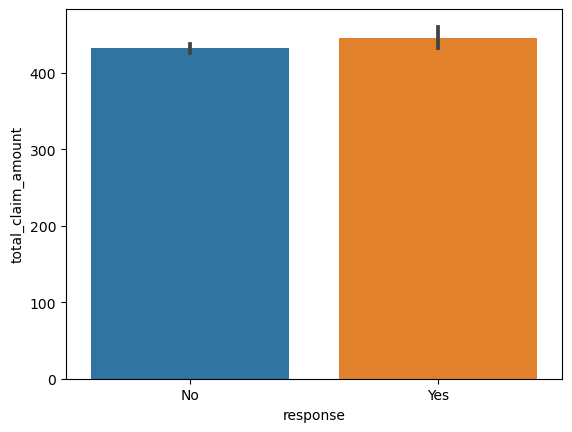

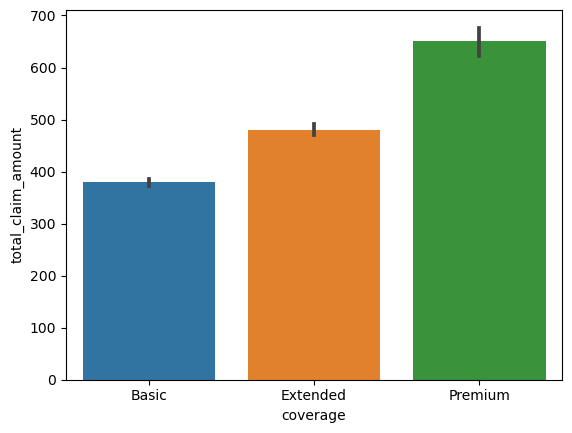

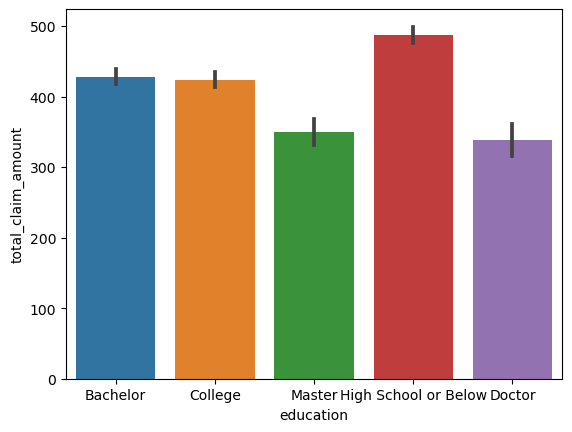

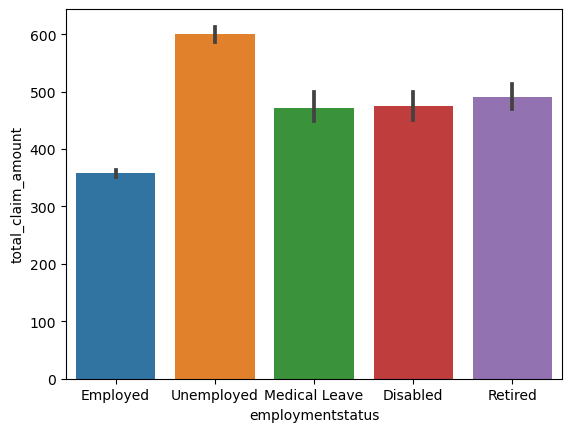

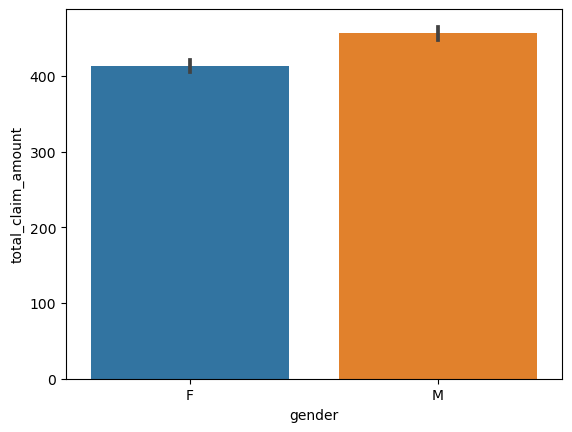

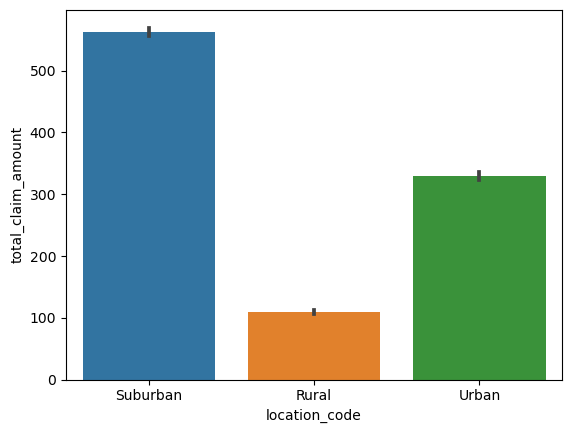

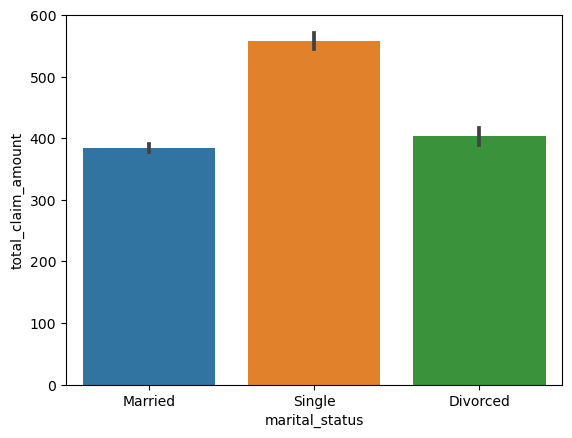

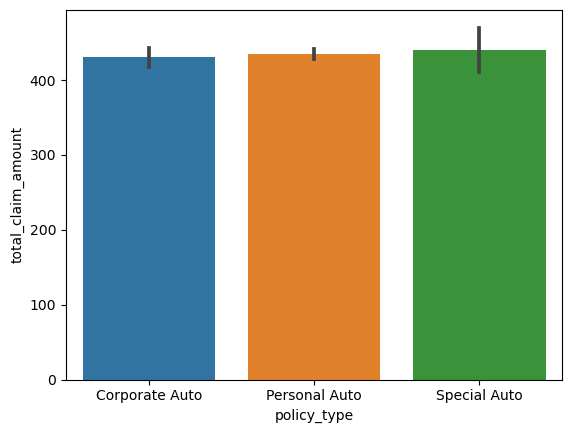

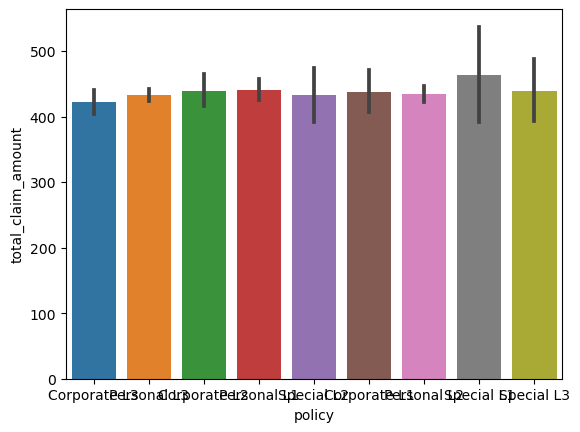

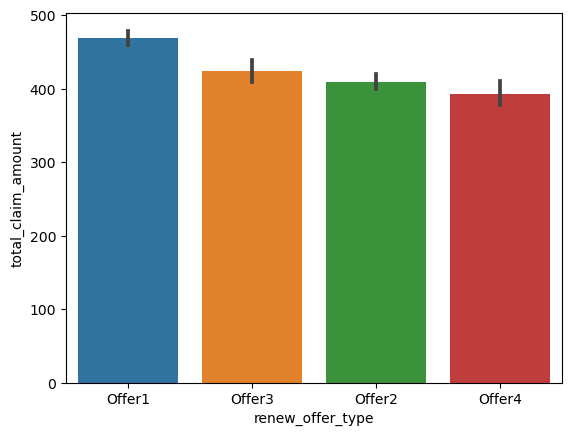

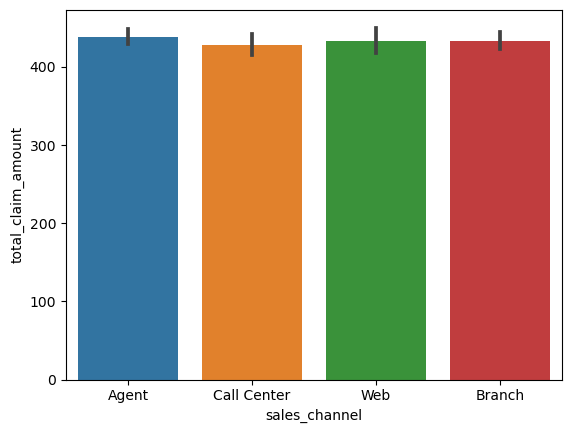

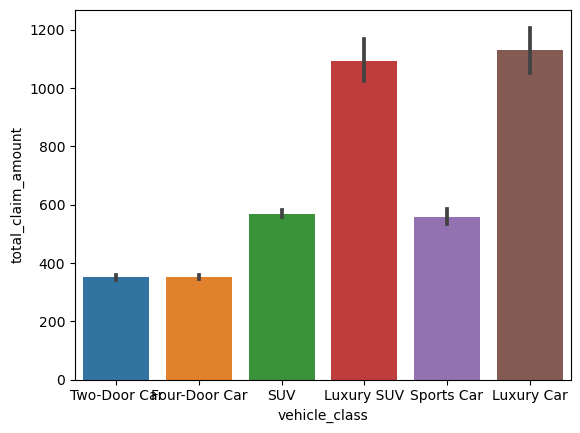

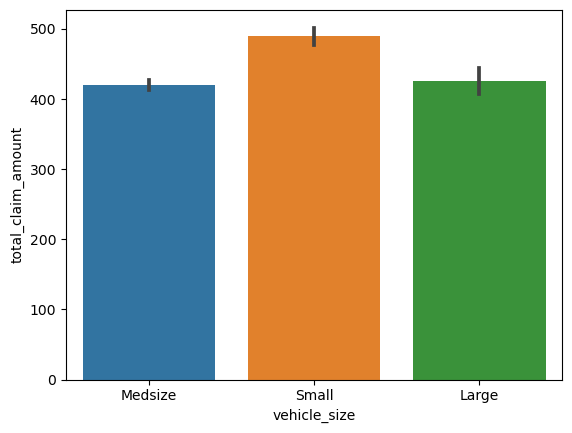

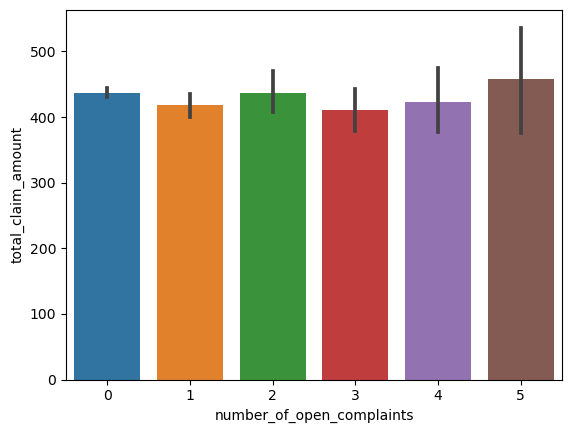

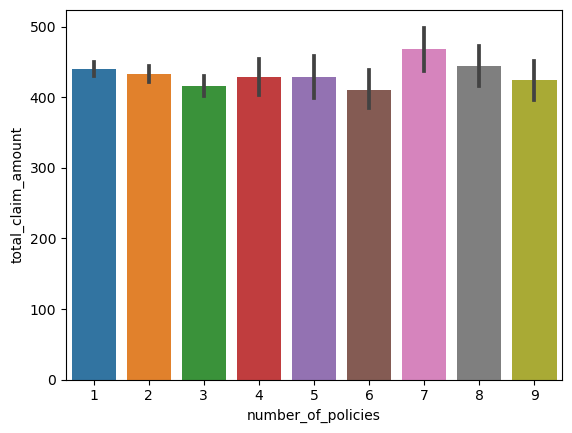

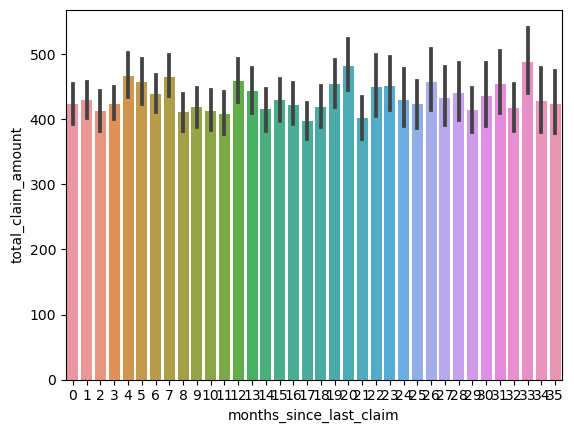

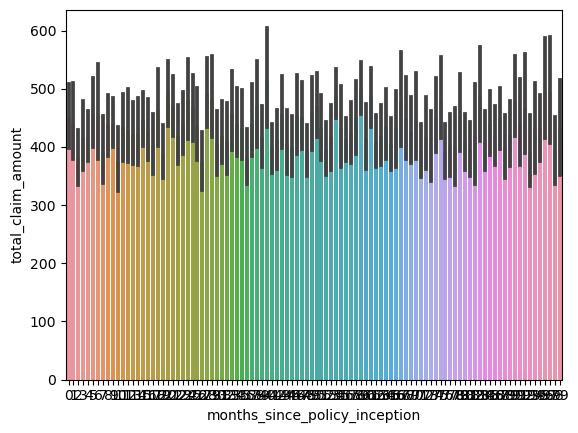

In [29]:
# the target is total_claim_amount

for column in categorical_df.columns:
    sns.barplot(data=customer_df, x=column, y="total_claim_amount")
    plt.show()

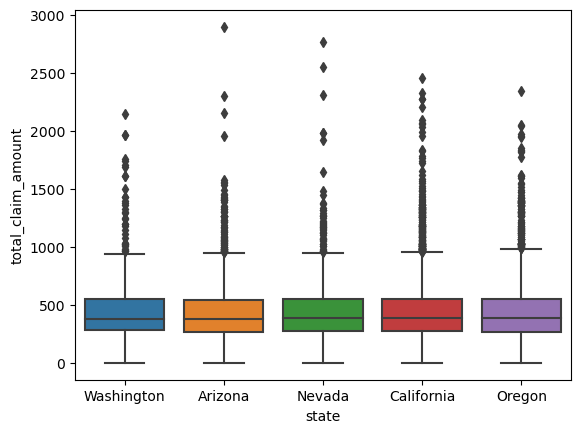

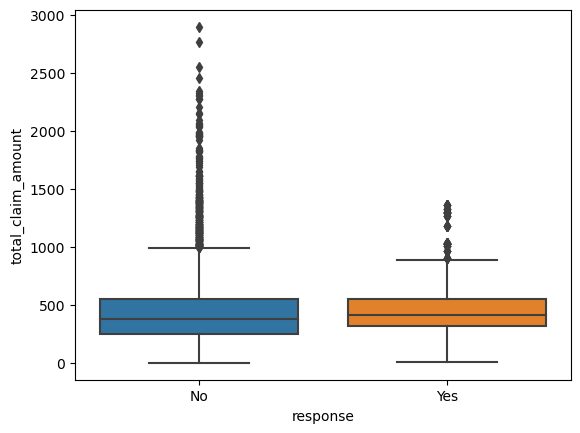

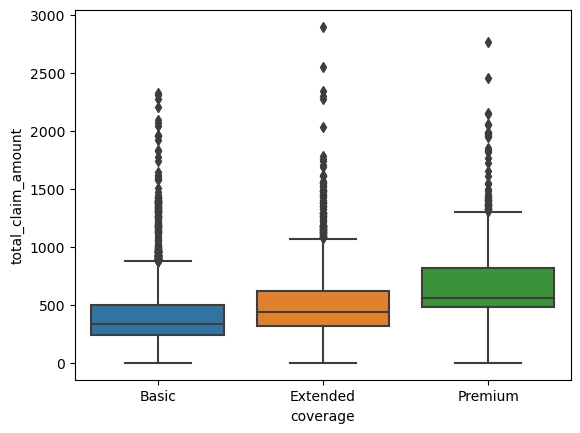

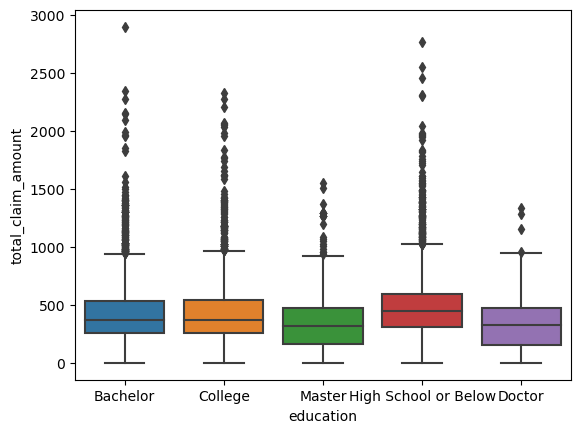

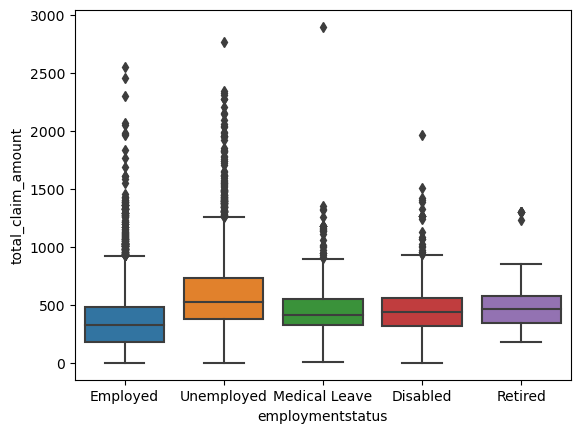

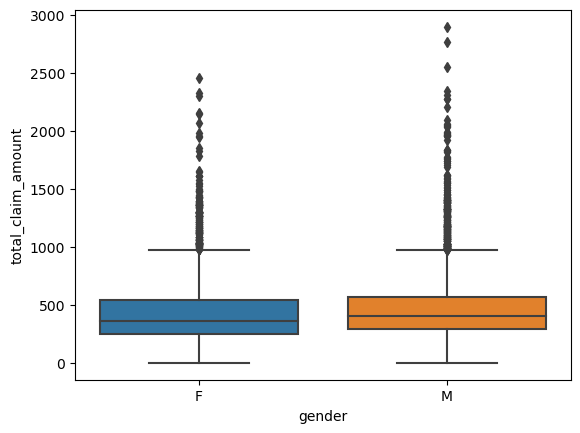

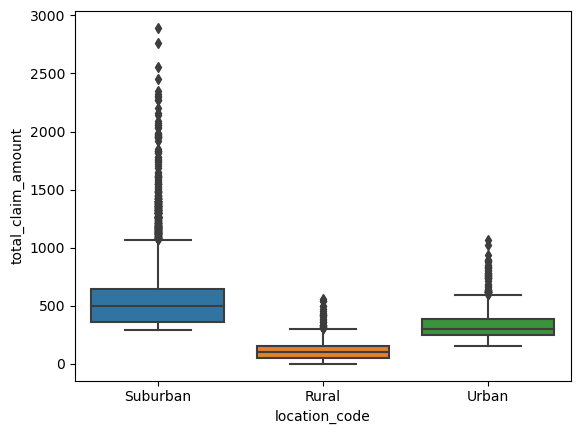

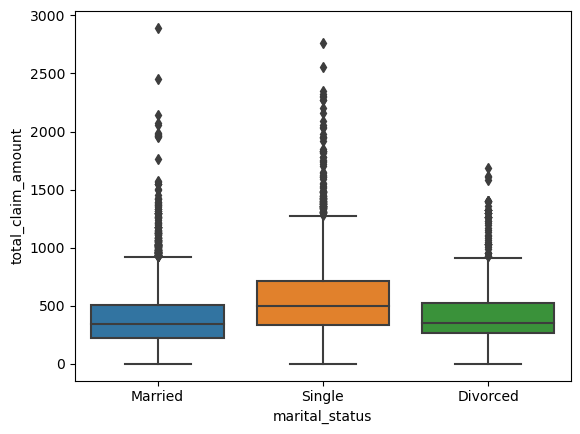

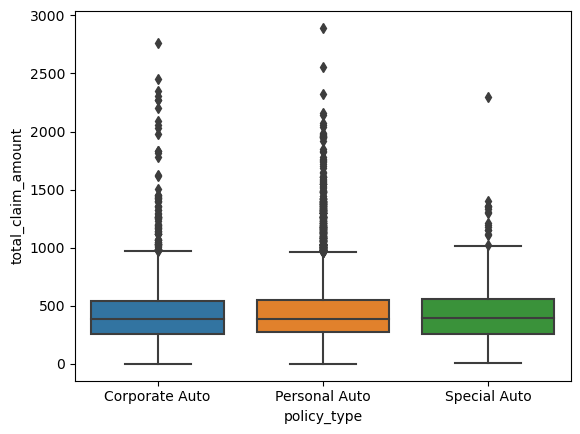

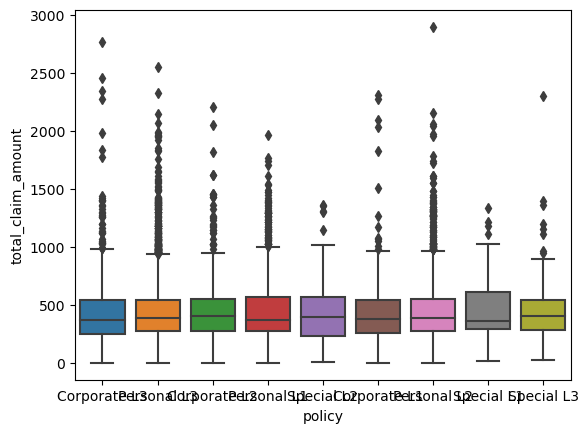

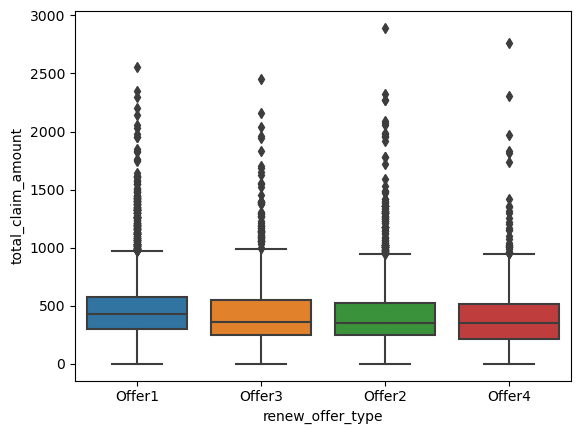

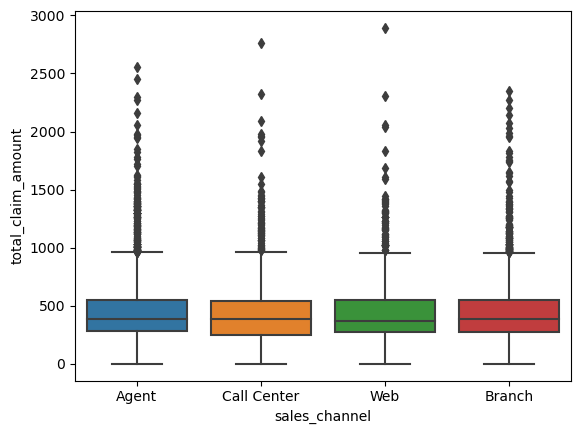

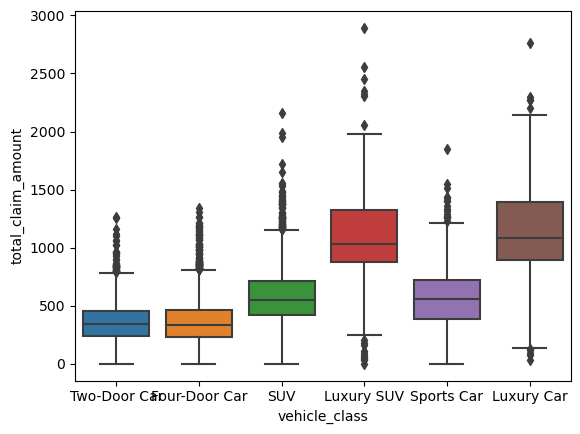

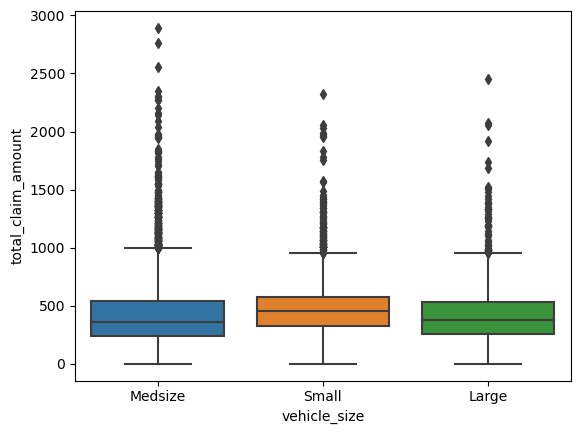

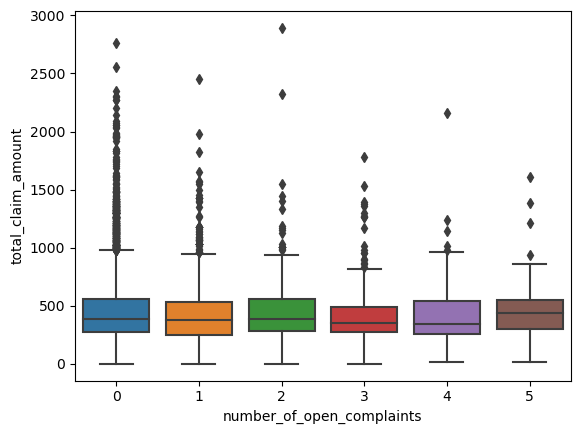

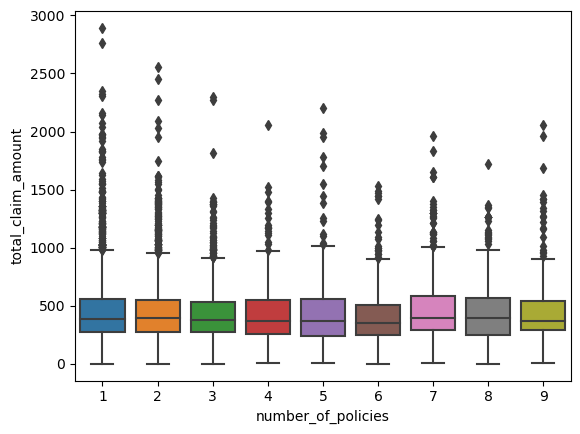

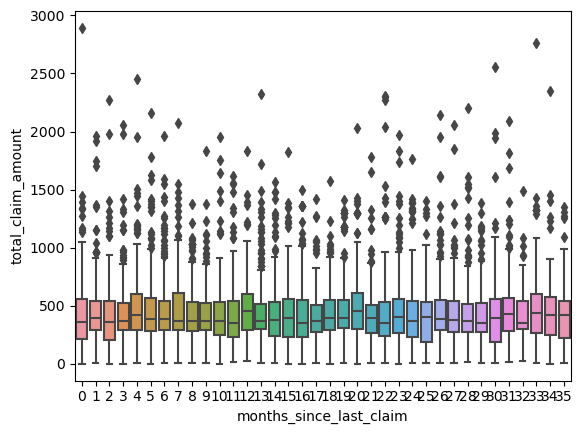

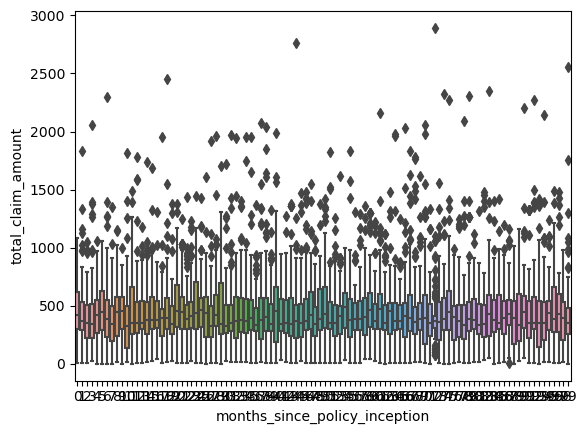

In [30]:
for column in categorical_df.columns:
    sns.boxplot(data=customer_df, x=column, y="total_claim_amount")
    plt.show()

- 'state': there is no effect on the target, therefore this column could be dropped
- 'response': in the barplot seems like there is no effect on target, however there are some interesting outliers in "No" shown by the boxplot. Keep the column
- 'coverage': positive correlation with target
- 'education': negative correlation with target. 3 groups (bachelor+college, master+doctor, high school or below)
- 'employmentstatus': three groups (employed, unemployed and others)
- 'gender': some variation
- 'location_code': high variations 
- 'marital_status': two groups (single and married/divorced)
- 'policy_type': no effect on target
- 'policy': no effect on target
- 'renew_offer_type': some variations depending on the offer type
- 'sales_channel': no effect on target
- 'vehicle_class': three groups (2 door + 4 door car, SUV + sports, luxury)
- 'vehicle_size': keep the 3 categories
- 'number_of_open_complaints': looks like there is some small variations 
- 'number_of_policies': small variations
- 'months_since_last_clame': small variations
- 'months_since_policy_inception': small variations

Conclusions considering these observations, together with the ones from the previous lab:

- Consider to drop the following columns: state, policy_type, policy, sales_channel
- 'coverage': ordinal, positive correlation with target
- 'education': ordinal, negative correlation with target. 3 groups (bachelor+college, master+doctor, high school or below)
- 'employmentstatus': three groups (employed, unemployed and others)
- 'gender': some variation
- 'location_code': 3 categories, high variations 
- 'marital_status': two groups (single and married/divorced)
- 'renew_offer_type': ordinal? some variations
- 'vehicle_class': three groups (2 door + 4 door car, SUV + sports, luxury)
- 'vehicle_size': ordinal
- 'number_of_open_complaints': small variations
- 'number_of_policies': small variations
- 'months_since_last_clame': small variations
- 'months_since_policy_inception': small variations


### 6. For the categorical data, check if there is any data cleaning that need to perform. 
Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.


In [31]:
for column in categorical_df.columns:
    print(column)
    print(categorical_df[column].value_counts())
    print("")

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
No     7826
Yes    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender
F    4658
M    4476
Name: gender, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int6

This information, together with the previous visualizations, can be used to decide which categories to keep, if it is better to drop some columns, etc.

In [32]:
drop_columns = ["state", "policy_type", "policy", "sales_channel"]

# LAB 3: Feature extraction

### 1. Open the categoricals variable we created before.

In [33]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints,number_of_policies,months_since_last_claim,months_since_policy_inception
customer,,,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1,32,5
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8,13,42
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2,18,38
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7,18,65
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1,12,44


### 2. Plot all the categorical variables with the proper plot

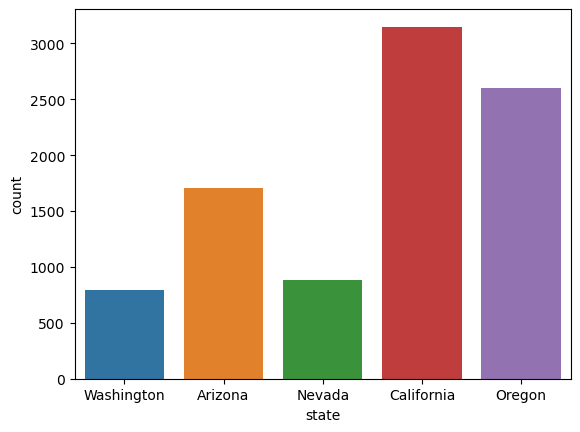

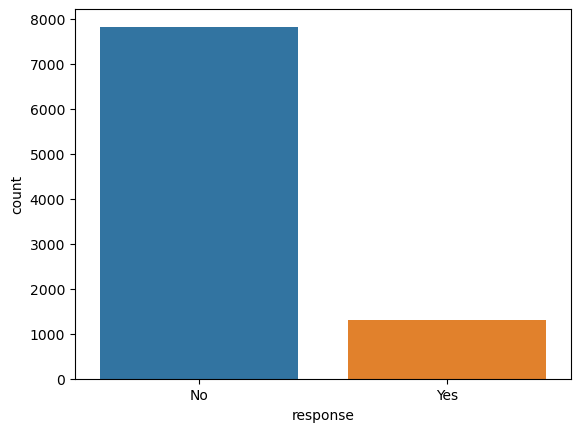

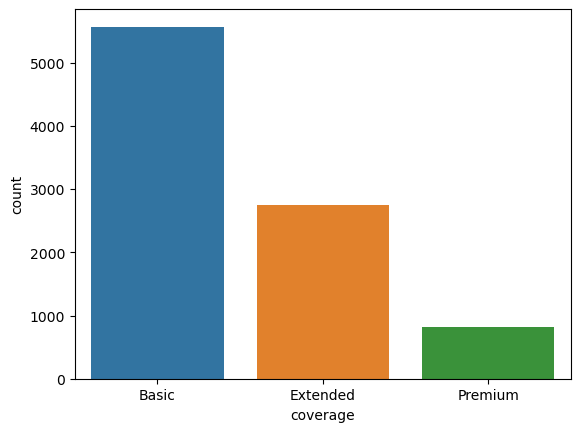

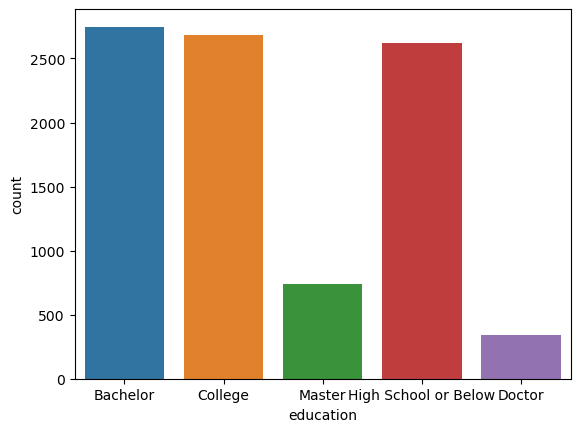

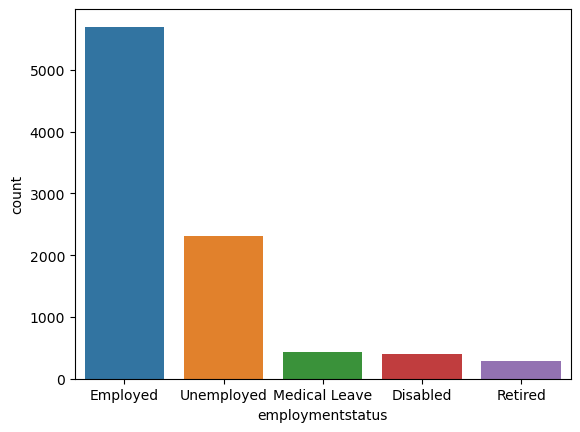

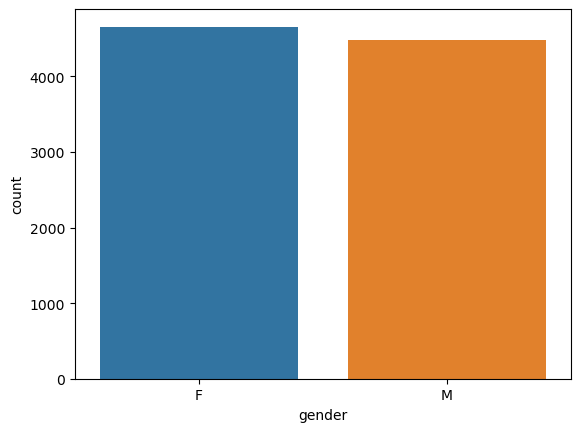

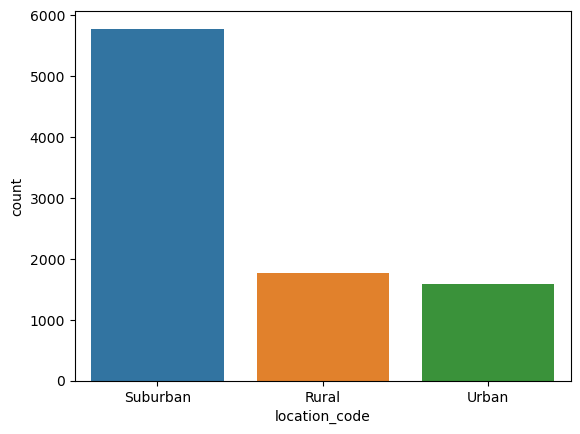

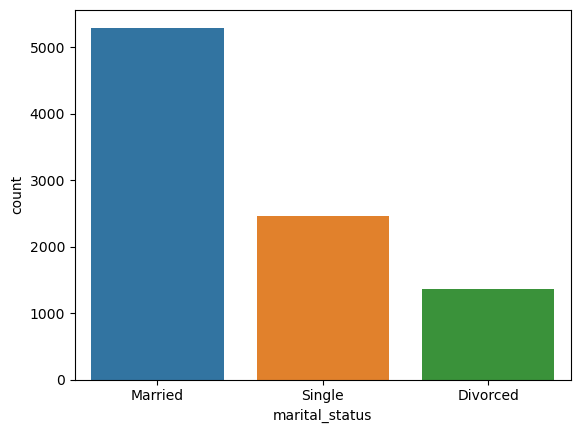

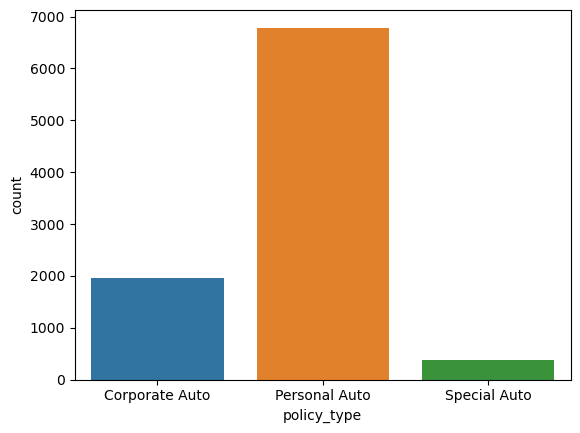

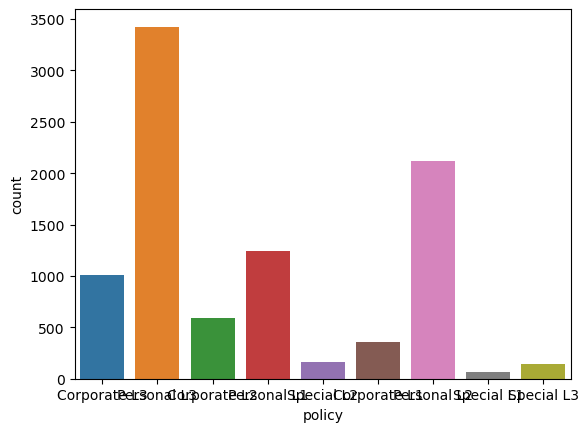

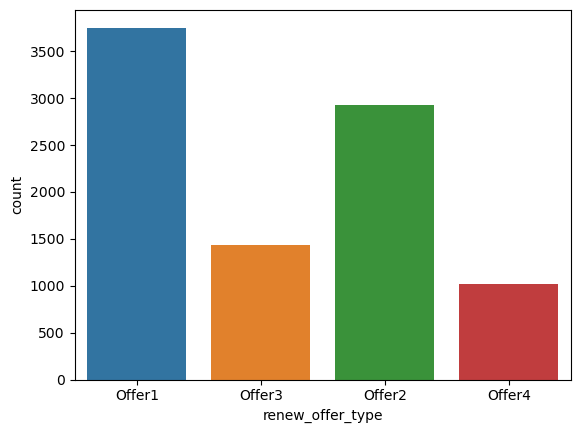

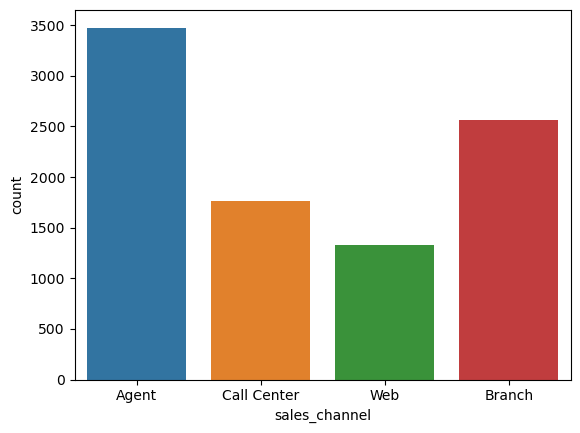

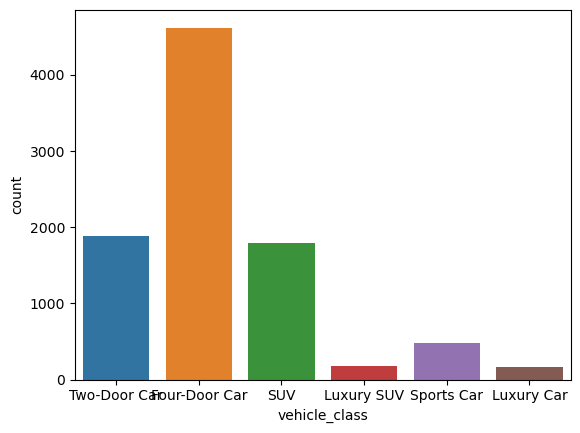

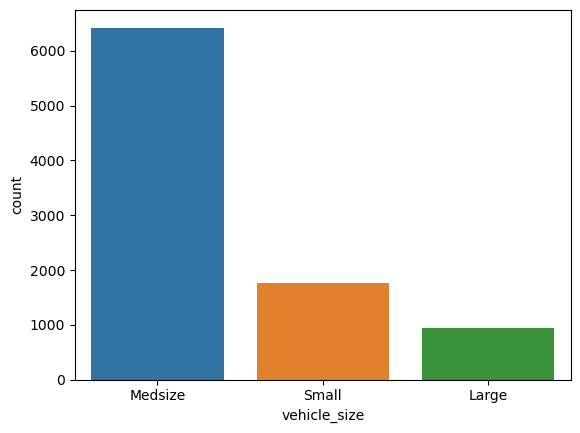

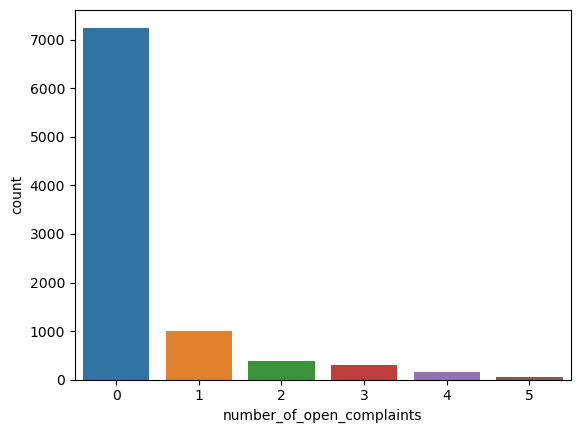

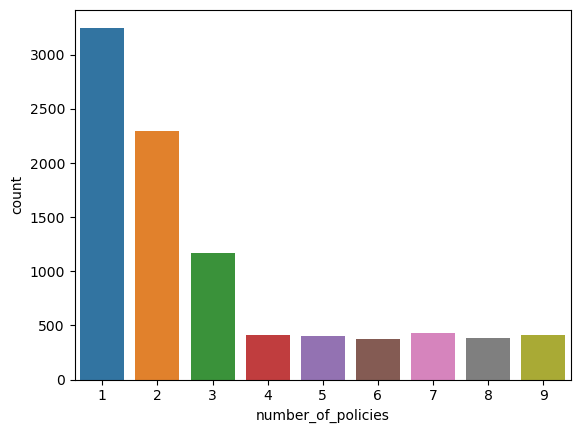

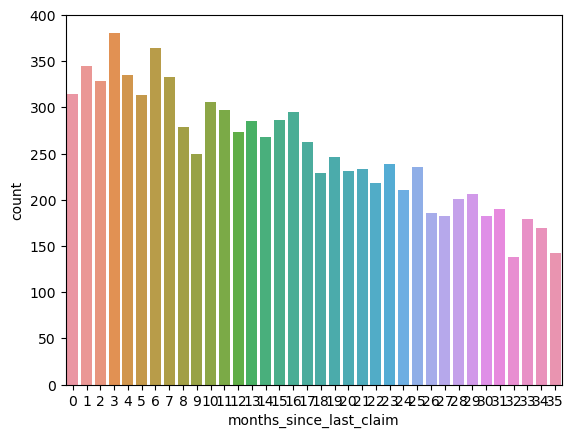

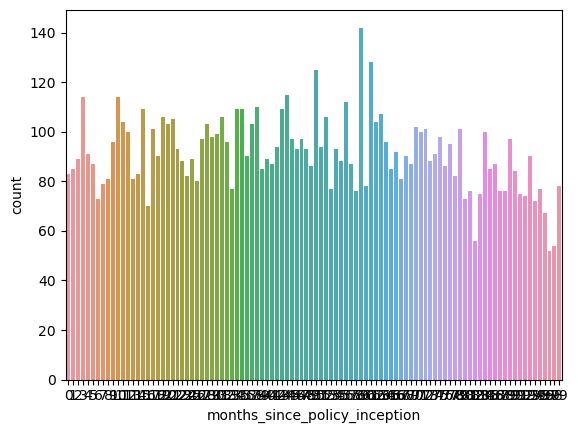

In [34]:
for column in categorical_df.columns:
    sns.countplot(categorical_df[column])
    plt.show()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [35]:
# policy_type and policy contain the same data

categorical_df["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [36]:
categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [37]:
# drop one of them: policy to avoid having too many categories
# although in future steps it's possible that we drop also policy_type since there is no effect in the target

categorical_df = categorical_df.drop("policy", axis=1)
drop_columns.remove("policy") 
drop_columns

['state', 'policy_type', 'sales_channel']

### 4. Plot time variable. Can you extract something from it?

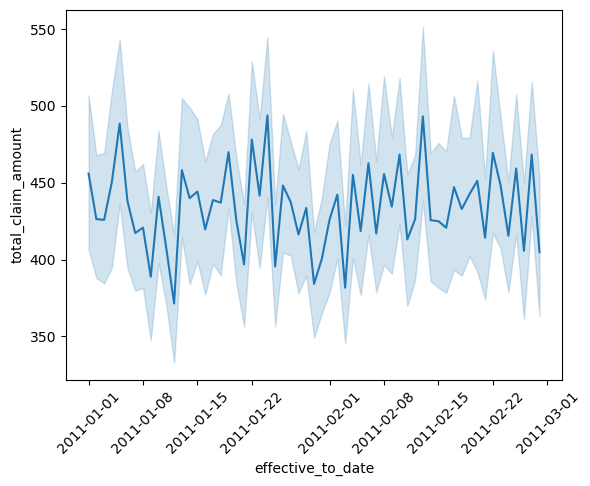

In [38]:
# plot the time variable against target (total claim amount)

sns.lineplot(data = customer_df, x = "effective_to_date", y = "total_claim_amount" )
plt.xticks(rotation=45)
plt.show()

In [39]:
customer_df["effective_to_date"].describe()

count                    9134
unique                     59
top       2011-01-10 00:00:00
freq                      195
first     2011-01-01 00:00:00
last      2011-02-28 00:00:00
Name: effective_to_date, dtype: object

In [40]:
# since the data is only from two months (january and february of 2011), extract the month

customer_df["month"] = customer_df["effective_to_date"].dt.month

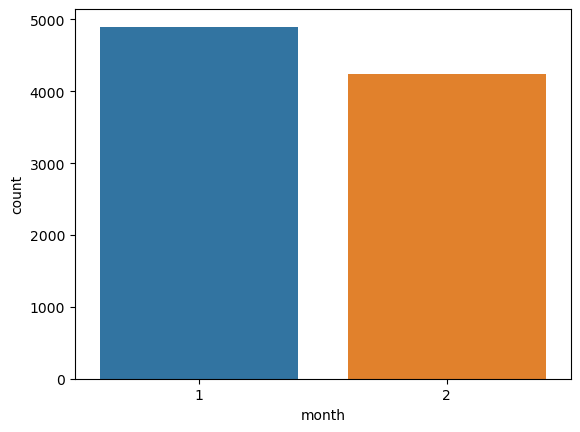

In [41]:
sns.countplot(customer_df["month"])
plt.show()

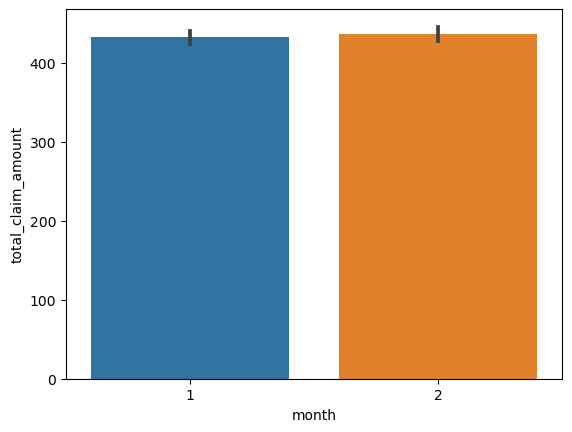

In [42]:
sns.barplot(data=customer_df, x="month", y="total_claim_amount")
plt.show()

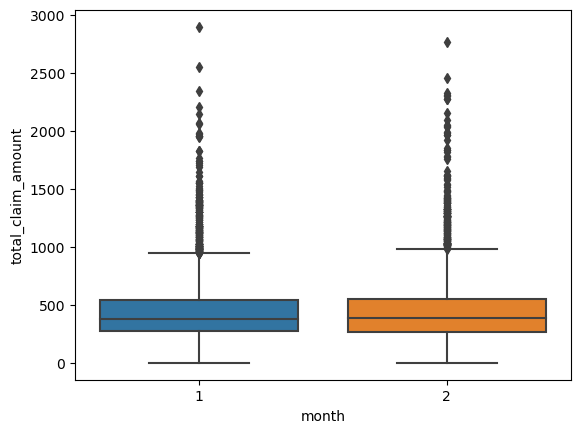

In [43]:
sns.boxplot(data=customer_df, x="month", y="total_claim_amount")
plt.show()

In [44]:
# the target is not affected by the month, therefore these columns could be dropped

drop_columns.extend(["month", "effective_to_date"])
drop_columns

['state', 'policy_type', 'sales_channel', 'month', 'effective_to_date']

#### More about dropping variables that have no correlation with the target

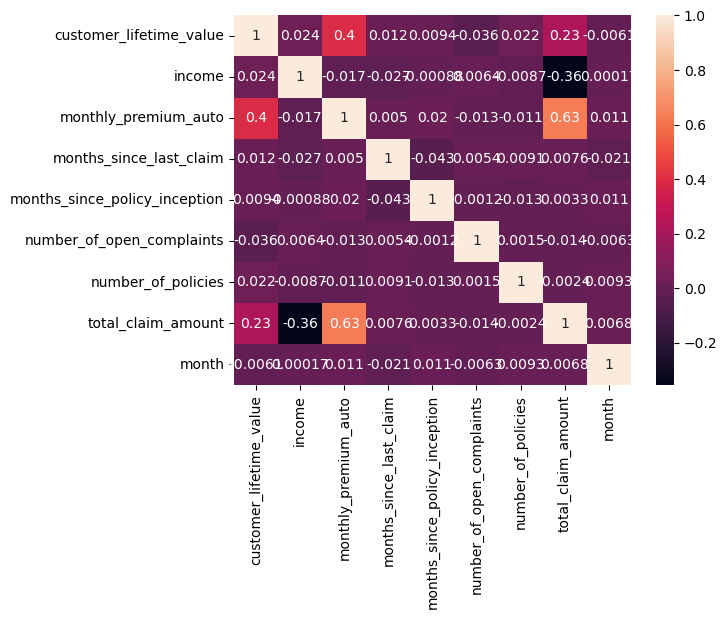

In [45]:
# check the numericals again

corr_matrix = customer_df.corr()
sns_plot = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [46]:
#  months_since_last_claim and months_since_policy_inception have very low correlation with total_claim_amount

drop_columns.extend(["months_since_last_claim", "months_since_policy_inception"])
drop_columns

['state',
 'policy_type',
 'sales_channel',
 'month',
 'effective_to_date',
 'months_since_last_claim',
 'months_since_policy_inception']

**Should we drop these columns?** <br>

Yes, if we are using a simple linear model, like linear or logistic regression. <br>
No, if the model is more complex, because there could be a more complex relationship between the independent variable and the target that we are not seeing but the model could use. In these cases, try the model with and without the features and see how it performs better. <br>

Source: https://datascience.stackexchange.com/questions/40602/can-we-remove-features-that-have-zero-correlation-with-the-target-label

# LAB 3: Data cleaning and wrangling

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

### 1. We will start with removing outliers. 
So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [47]:
# there are outliers in customer_lifetime_value, monthly_premium_auto, total_claim_amount
# removing the outliers should be done after feature selection, but this 3 variables are not in the list of columns to drop 

columns_outliers = ["customer_lifetime_value", "monthly_premium_auto", "total_claim_amount"]

In [48]:
customer_df.shape

(9134, 24)

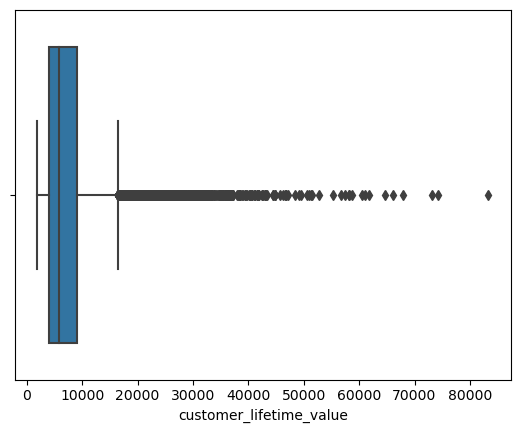

In [49]:
# customer_lifetime_value

sns.boxplot(customer_df["customer_lifetime_value"])
plt.show()

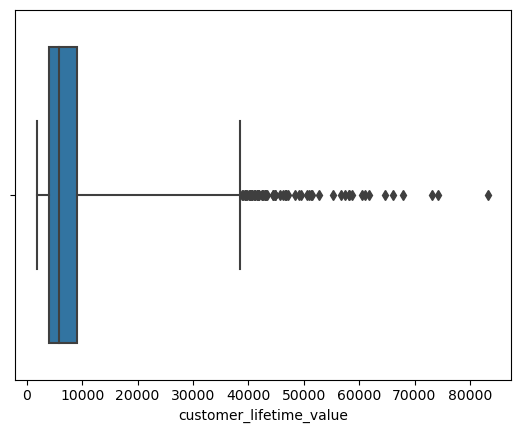

In [50]:
# change the threshold to avoid removing too much data

sns.boxplot(customer_df["customer_lifetime_value"], whis = 6)
plt.show()

In [51]:
upper = np.percentile(customer_df["customer_lifetime_value"],75)
lower = np.percentile(customer_df["customer_lifetime_value"],25)
iqr = upper - lower
upper_limit = upper + 6 * iqr 
lower_limit = lower - 6 * iqr    
customer_df = customer_df[(customer_df["customer_lifetime_value"]>lower_limit) & (customer_df["customer_lifetime_value"]<upper_limit)]
customer_df.shape

(9068, 24)

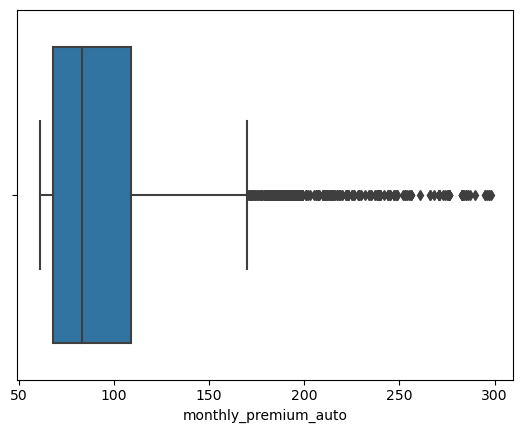

In [52]:
# monthly_premium_auto

sns.boxplot(customer_df["monthly_premium_auto"])
plt.show()

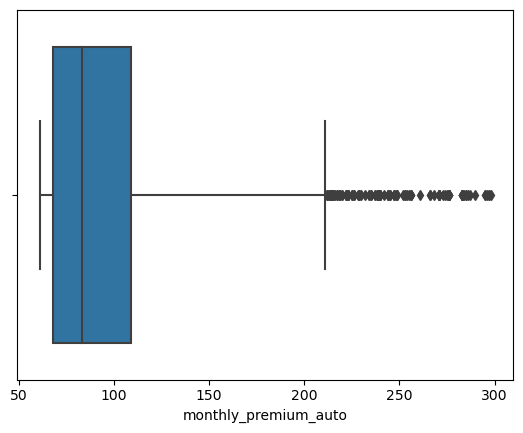

In [53]:
sns.boxplot(customer_df["monthly_premium_auto"], whis = 2.5)
plt.show()

In [54]:
upper = np.percentile(customer_df["monthly_premium_auto"],75)
lower = np.percentile(customer_df["monthly_premium_auto"],25)
iqr = upper - lower
upper_limit = upper + 2.5 * iqr 
lower_limit = lower - 2.5 * iqr    
customer_df = customer_df[(customer_df["monthly_premium_auto"]>lower_limit) & (customer_df["monthly_premium_auto"]<upper_limit)]
customer_df.shape

(8943, 24)

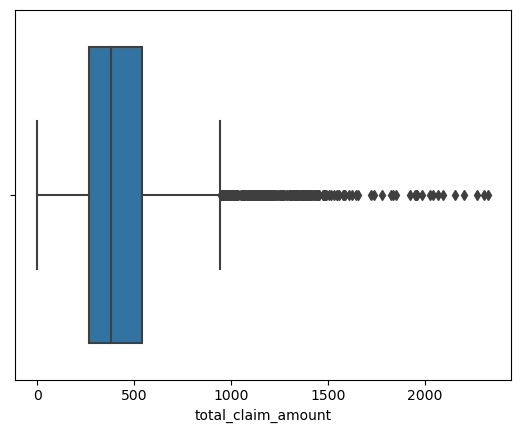

In [55]:
# total_claim_amount

sns.boxplot(customer_df["total_claim_amount"])
plt.show()

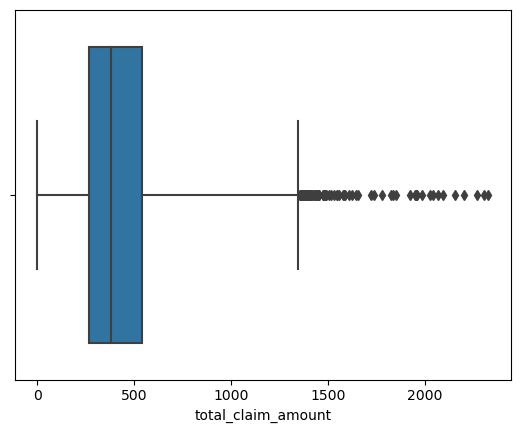

In [56]:
sns.boxplot(customer_df["total_claim_amount"], whis = 3)
plt.show()

In [57]:
upper = np.percentile(customer_df["total_claim_amount"],75)
lower = np.percentile(customer_df["total_claim_amount"],25)
iqr = upper - lower
upper_limit = upper + 2.5 * iqr 
lower_limit = lower - 2.5 * iqr    
customer_df = customer_df[(customer_df["total_claim_amount"]>lower_limit) & (customer_df["total_claim_amount"]<upper_limit)]
customer_df.shape

(8800, 24)

### 2. Create a copy of the dataframe for the data wrangling.

In [58]:
df_copy = customer_df.copy()

In [59]:
# split continuous and categorical variables

X_cont = df_copy[['customer_lifetime_value', 'income', 'monthly_premium_auto', 
       'total_claim_amount']]
X_cat = df_copy.drop(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'total_claim_amount'], axis=1)

In [60]:
# split the target

y = X_cont["total_claim_amount"]
X_cont = X_cont.drop("total_claim_amount", axis=1)

### 3. Normalize the continuous variables. You can use any one method you want.

In [61]:
# box-cox transformation

In [62]:
def boxcox_transform(df):
    continous_cols = df.columns
    _ci = {column: None for column in continous_cols}
    for column in continous_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(X_cont)

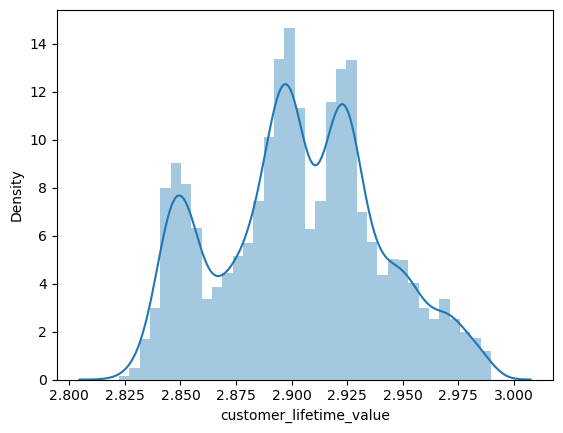

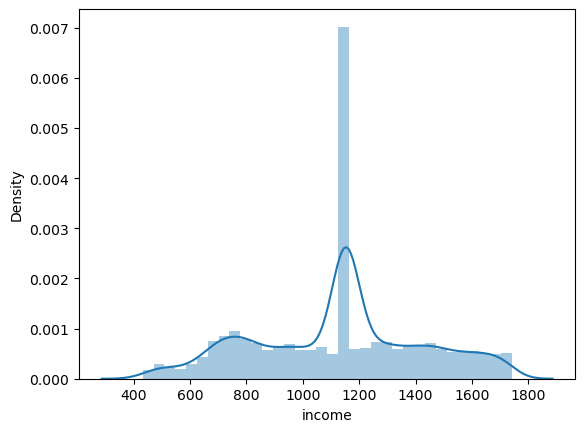

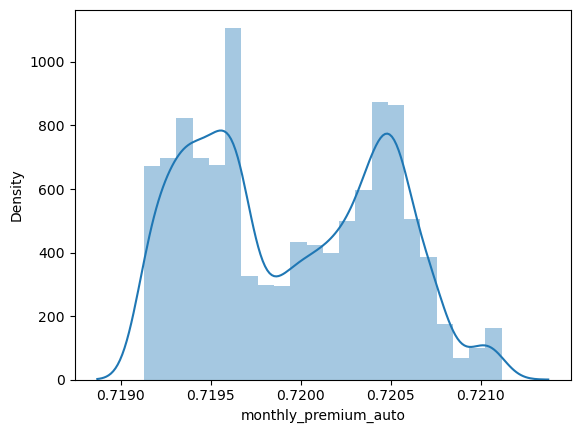

In [63]:
for column in X_cont.columns:
    sns.distplot(X_cont[column])
    plt.show()

### 4. Encode the categorical variables

In [64]:
X_cat.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'month'],
      dtype='object')

In [65]:
drop_columns

['state',
 'policy_type',
 'sales_channel',
 'month',
 'effective_to_date',
 'months_since_last_claim',
 'months_since_policy_inception']

In [66]:
# encoding should be done after feature selection, therefore drop the columns in the list
# not the time variable since we have to use it the next step of the lab

X_cat = X_cat.drop(['state', 'policy_type', 'sales_channel', 'months_since_last_claim', 
                    'months_since_policy_inception', 'policy'], axis=1)
X_cat.columns

Index(['response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'renew_offer_type',
       'vehicle_class', 'vehicle_size', 'month'],
      dtype='object')

In [67]:
for column in X_cat.columns:
    print(column)
    print(X_cat[column].value_counts())
    print("")

response
No     7540
Yes    1260
Name: response, dtype: int64

coverage
Basic       5473
Extended    2606
Premium      721
Name: coverage, dtype: int64

education
Bachelor                2650
College                 2597
High School or Below    2507
Master                   711
Doctor                   335
Name: education, dtype: int64

effective_to_date
2011-01-27    191
2011-01-10    187
2011-02-14    181
2011-01-03    174
2011-01-26    174
2011-01-19    173
2011-01-17    172
2011-01-31    170
2011-01-20    169
2011-01-28    167
2011-01-11    164
2011-02-26    164
2011-02-27    163
2011-02-19    162
2011-02-28    157
2011-01-21    157
2011-01-05    156
2011-02-03    156
2011-02-05    155
2011-01-29    155
2011-01-02    155
2011-02-04    154
2011-02-12    152
2011-02-07    151
2011-02-01    149
2011-01-18    149
2011-01-23    148
2011-01-07    148
2011-02-10    148
2011-01-25    148
2011-02-21    147
2011-01-08    146
2011-01-15    146
2011-02-11    146
2011-02-18    145
2011-02-25   

In [68]:
# response: onehot

In [69]:
# coverage: ordinal

X_cat["coverage"] = X_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_cat["coverage"].value_counts()

0    5473
1    2606
2     721
Name: coverage, dtype: int64

In [70]:
# education 

def clean_education(x):
    if x == "High School or Below":
        return 0
    elif x in ["College", "Bachelor"]:
        return 1
    elif x in ["Master", "Doctor"]:
        return 2
    
X_cat["education"] = X_cat["education"].apply(clean_education)
X_cat["education"].value_counts()

1    5247
0    2507
2    1046
Name: education, dtype: int64

In [71]:
# employment status

X_cat["employmentstatus"] = X_cat["employmentstatus"].apply(lambda x: x if x.endswith("ployed") else "Other")
X_cat["employmentstatus"].value_counts()

# then onehot (in the instructions they say ordinal but I don't see the order)

Employed      5533
Unemployed    2179
Other         1088
Name: employmentstatus, dtype: int64

In [72]:
# gender: onehot

In [73]:
# location code: ordinal

X_cat["location_code"] = X_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_cat["location_code"].value_counts()

1    5487
0    1751
2    1562
Name: location_code, dtype: int64

In [74]:
# marital status

X_cat["marital_status"] = X_cat["marital_status"].apply(lambda x: "Married/Divorced" if x != "Single" else x)
X_cat["marital_status"].value_counts()

# then onehot

Married/Divorced    6482
Single              2318
Name: marital_status, dtype: int64

In [75]:
# number of open complaints, number of policies, leave them as they are

In [76]:
# renew offer type: onehot

In [77]:
# vehicle class

def clean_vehicle_class(x):
    if x in ["Four-Door Car", "Two-Door Car"]:
        return "Normal car"
    elif x in ["Luxury SUV", "Luxury Car"]:
        return "Luxury car"
    else:
        return "Other"
    
X_cat["vehicle_class"] = X_cat["vehicle_class"].apply(clean_vehicle_class)
X_cat["vehicle_class"].value_counts()

# then onehot

Normal car    6492
Other         2177
Luxury car     131
Name: vehicle_class, dtype: int64

In [78]:
# vehicle size 

X_cat["vehicle_size"] = X_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
X_cat["vehicle_size"].value_counts()

1    6193
0    1696
2     911
Name: vehicle_size, dtype: int64

In [85]:
# get dummies applies one hot encoding to all categoricals and leaves the numerical as they are

X_cat_dum = pd.get_dummies(X_cat, drop_first=True) 
X_cat_dum.head()

,coverage,education,effective_to_date,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month,response_Yes,employmentstatus_Other,employmentstatus_Unemployed,gender_M,marital_status_Single,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Normal car,vehicle_class_Other
customer,,,,,,,,,,,,,,,,,,
BU79786,0,1,2011-02-24,1,0,1,1,2,0,0,0,0,0,0,0,0,1,0
QZ44356,1,1,2011-01-31,1,0,8,1,1,0,0,1,0,1,0,1,0,1,0
AI49188,2,1,2011-02-19,1,0,2,1,2,0,0,0,0,0,0,0,0,1,0
WW63253,0,1,2011-01-20,1,0,7,1,1,0,0,1,1,0,0,0,0,0,1
HB64268,0,1,2011-02-03,0,0,1,1,2,0,0,0,1,1,0,0,0,1,0


### 5. The time variable can be useful. 
Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [88]:
# we already have the month column

# day column

X_cat_dum["day"] = X_cat_dum["effective_to_date"].dt.day

# week column

X_cat_dum["week"] = X_cat_dum["effective_to_date"].dt.week

X_cat_dum = X_cat_dum.drop("effective_to_date", axis=1)

X_cat_dum.head()

,coverage,education,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month,response_Yes,employmentstatus_Other,employmentstatus_Unemployed,gender_M,marital_status_Single,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Normal car,vehicle_class_Other,day,week
customer,,,,,,,,,,,,,,,,,,,
BU79786,0,1,1,0,1,1,2,0,0,0,0,0,0,0,0,1,0,24,8
QZ44356,1,1,1,0,8,1,1,0,0,1,0,1,0,1,0,1,0,31,5
AI49188,2,1,1,0,2,1,2,0,0,0,0,0,0,0,0,1,0,19,7
WW63253,0,1,1,0,7,1,1,0,0,1,1,0,0,0,0,0,1,20,3
HB64268,0,1,0,0,1,1,2,0,0,0,1,1,0,0,0,1,0,3,5


In [90]:
# reorder columns

X_cat_dum = X_cat_dum[['coverage', 'education', 'location_code', 'number_of_open_complaints',
       'number_of_policies', 'vehicle_size', 'response_Yes',
       'employmentstatus_Other', 'employmentstatus_Unemployed', 'gender_M',
       'marital_status_Single', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'vehicle_class_Normal car', 'vehicle_class_Other', 'day', 'week', 'month']]

X_cat_dum.head()

,coverage,education,location_code,number_of_open_complaints,number_of_policies,vehicle_size,response_Yes,employmentstatus_Other,employmentstatus_Unemployed,gender_M,marital_status_Single,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Normal car,vehicle_class_Other,day,week,month
customer,,,,,,,,,,,,,,,,,,,
BU79786,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,24,8,2
QZ44356,1,1,1,0,8,1,0,0,1,0,1,0,1,0,1,0,31,5,1
AI49188,2,1,1,0,2,1,0,0,0,0,0,0,0,0,1,0,19,7,2
WW63253,0,1,1,0,7,1,0,0,1,1,0,0,0,0,0,1,20,3,1
HB64268,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,3,5,2


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [92]:
X_cont.dtypes

customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
dtype: object

In [93]:
X_cat_dum.dtypes

coverage                       int64
education                      int64
location_code                  int64
number_of_open_complaints      int64
number_of_policies             int64
vehicle_size                   int64
response_Yes                   uint8
employmentstatus_Other         uint8
employmentstatus_Unemployed    uint8
gender_M                       uint8
marital_status_Single          uint8
renew_offer_type_Offer2        uint8
renew_offer_type_Offer3        uint8
renew_offer_type_Offer4        uint8
vehicle_class_Normal car       uint8
vehicle_class_Other            uint8
day                            int64
week                           int64
month                          int64
dtype: object

In [94]:
y.dtypes

dtype('float64')

In [ ]:
# all data is numerical